### Problem Statement

We want to model the number of bacteria grown in a set time interval, $y$. For this we have two features.

$$
x_{\textrm{temprature}} \in \mathbb{R}
$$

$$
x_{\textrm{humidity}} =
    \begin{cases}
      1 & \text{if humidity $> 80\%$}\\
      0 & \text{if humidity $\leq 80\%$}
    \end{cases}  
$$

Firstly, we examine the data to find a suitable model.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Plotting configuration
%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams.update({'font.size': 10})

In [2]:
df = pd.read_csv('data/exponential_regression.csv')
[bacteria, temp, humidity] = df[['bacteria_grown', 'tempreature', 'humiditiy']]
df.head()

,bacteria_grown,tempreature,humiditiy
0,80750.679832,24.817575,1
1,33842.079471,23.825936,0
2,194891.669321,23.268858,1
3,15359.851544,21.030399,1
4,64627.861059,23.704124,0


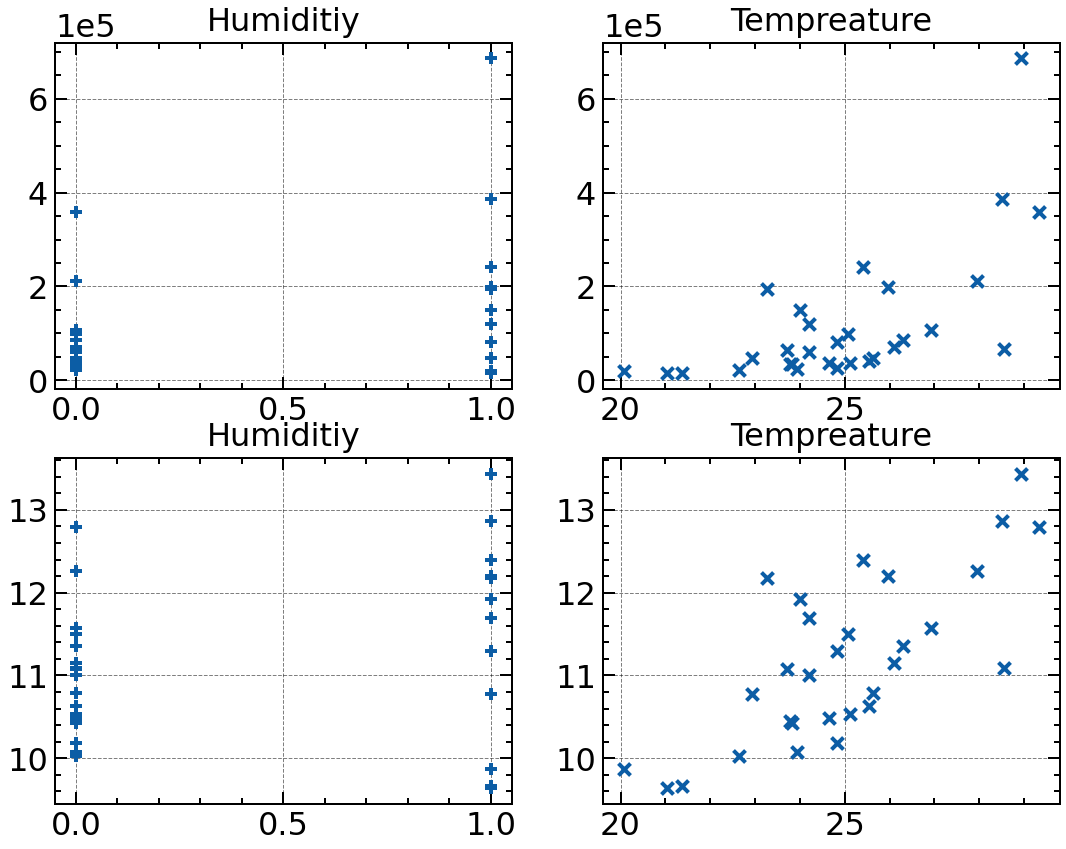

In [17]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(df['humiditiy'], df['bacteria_grown'], marker='+')
axs[0, 0].set_title('Humiditiy')
axs[0, 0].ticklabel_format(axis='y', style='sci', scilimits=(5, 5))

axs[1, 0].scatter(df['humiditiy'], np.log(df['bacteria_grown']), marker='+')
axs[1, 0].set_title('Humiditiy')

axs[0, 1].scatter(df['tempreature'], df['bacteria_grown'], marker='x')
axs[0, 1].set_title('Tempreature')
axs[0, 1].ticklabel_format(axis='y', style='sci', scilimits=(5, 5))

axs[1, 1].scatter(df['tempreature'], np.log(df['bacteria_grown']), marker='x')
axs[1, 1].set_title('Tempreature')

fig.set_size_inches(9, 7)
plt.show()

### Model Selection

Since the data is exponential with respect to the features. We can simply modify the problem statement by examining the log-transformed data instead. This way we can utilize linear regression models to find an exponential curve that best fits the data. This is acceptable since the transformation $f(z) = e^z$ is a bijection. Therefore our regression model becomes:

$$
Y_i = \exp\big\{\beta_0 + \beta_1 x_{\text{temp}} + \beta_2 x_{\text{humidity}} + \varepsilon_i \big\} \implies
$$

$$
Z_i \triangleq \ln Y_i = \beta_0 + \beta_1 x_{\text{temp}} + \beta_2 x_{\text{humidity}} + \varepsilon_i
$$

In the coming section we solve to normal equations to obtain the OLS estimate of $\hat{\mathbf{\beta}}$ and plot the resulting regression line and print its $R^2$ and $R_{\text{adj}}^2$ values.

Recall, the normal equations:
$$
\hat{\mathbf{\beta}} =\mathbf{X}^{\dagger}Z = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}Z
$$

And the definition of the explanatory power:

$$
R^2 = 1 - \frac{\text{SSE}}{\text{SST}}
$$

$$
R_{\text{adj}}^2 = 1 - \frac{\text{SSE} / (n-k-1)}{\text{SST} / (n - 1)} 
$$

In which:

$$
\text{SST} = \sum_{i=1}^n(z_i - \bar{z})^2
$$
$$
\text{SSE} = \sum_{i=1}^n(z_i - \hat{z}_i)^2
$$

### Residual Analysis

### Prediction Interval